<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Sistema inteligente para ayudar a detectar posibles reclamos (glosas) en las cuentas médicas previo al cobro, de una clínica en Colombia - Audimed</h1></center>
<center><h2>Trabajo Fin de Master<br>Máster Universitario en Análisis y Visualización de Datos Masivos / Visual Analytics and Big Data</h2></center>

<h3>Presentado por: Jacqueline Guzmán Rodriguez</h3>
<h4>Tipo de trabajo: Desarrollo Software <br>
Director: Juan Carlos Rincon Acuña <br>
Fecha: Junio/2024</h4>

<h3> <font color="#040078">Notebook de exploración de los datos, despues de transformados</font></h3>
<h4>Del proceso de transformación se obtiene un archivo CSV (claims.cvs), el cual es el que vamos a utilizar de ahora en adelante, en este script se exploran los datos para detectar posibles patrones de los datos, antes del modelo de datos</h4>
<h5><font color="#C62400">Licencia del Notebook CC BY-NC-SA 4.0 DEED <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/" target="_blank]">https://creativecommons.org/licenses/by-nc-sa/4.0/</a></font></h5/>

## Importación de librerias necesarias

In [10]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
import dataframe_image as dfi

## Carga de archivo con datos transformados claims.cvs
#### Se pueden descargar los datos de la plataforma kaggle en el siguiente link: 
##### https://www.kaggle.com/datasets/jacquelineguzman/claims-of-medical-billing/

In [11]:
# Read file CSV Download of https://www.kaggle.com/datasets/jacquelineguzman/claims-of-medical-billing/
file_cvs = "claims.csv"
# Create dataframe with information of file CSV
df = pd.read_csv(file_cvs, delimiter=',', encoding='utf-8')

In [12]:
# Define colums target (CLAIM)
columns = df.columns
target = "CLAIM"
x_columns = columns.drop(target)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104443 entries, 0 to 6104442
Data columns (total 54 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   TYPE_ATTENTION                int64  
 1   DETAIL_ATTENTION              int64  
 2   SEQ_ATTENTION                 int64  
 3   SEQ_PATIENT                   int64  
 4   SEQ_ATTEN_PATIENT             int64  
 5   ROOM_ATTENTION                int64  
 6   MAIN_SPECIALITY               int64  
 7   SEQ_DOCTOR                    int64  
 8   TYPE_PAYMENT_REPON            int64  
 9   PAYMENT_REPONSIBLE            int64  
 10  FEE_ATTENTION                 int64  
 11  SEX_PATIENT                   int64  
 12  AGE_PATIENT_START_ATTENTION   int64  
 13  AGE_PATIENT_FINISH_ATTENTION  int64  
 14  MINUTES_STAY                  int64  
 15  TYPE_AFFILIATE                int64  
 16  TYPE_AFFILIATION_REGIME       int64  
 17  NUM_HISTORY_MED_SET_1         int64  
 18  NUM_HISTORY_MED_SET_2 

In [14]:
# Update datatype int64 to int32 and float64 to float32, because it is necessary to use less RAM
float_columns = ['QUANTITY_PRODUCT_SERVICE', 'SALES_PRICE', 'INVOICED_PRICE']
int_columns = columns.drop(float_columns)
df[float_columns]=df[float_columns].astype(np.float32)
df[int_columns]=df[int_columns].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104443 entries, 0 to 6104442
Data columns (total 54 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   TYPE_ATTENTION                int32  
 1   DETAIL_ATTENTION              int32  
 2   SEQ_ATTENTION                 int32  
 3   SEQ_PATIENT                   int32  
 4   SEQ_ATTEN_PATIENT             int32  
 5   ROOM_ATTENTION                int32  
 6   MAIN_SPECIALITY               int32  
 7   SEQ_DOCTOR                    int32  
 8   TYPE_PAYMENT_REPON            int32  
 9   PAYMENT_REPONSIBLE            int32  
 10  FEE_ATTENTION                 int32  
 11  SEX_PATIENT                   int32  
 12  AGE_PATIENT_START_ATTENTION   int32  
 13  AGE_PATIENT_FINISH_ATTENTION  int32  
 14  MINUTES_STAY                  int32  
 15  TYPE_AFFILIATE                int32  
 16  TYPE_AFFILIATION_REGIME       int32  
 17  NUM_HISTORY_MED_SET_1         int32  
 18  NUM_HISTORY_MED_SET_2 

In [16]:
# Verify values null
print("Null Count: "+str(df.isnull().sum().sum())+"\n")
print(df.isnull().sum())

Null Count: 0

TYPE_ATTENTION                  0
DETAIL_ATTENTION                0
SEQ_ATTENTION                   0
SEQ_PATIENT                     0
SEQ_ATTEN_PATIENT               0
ROOM_ATTENTION                  0
MAIN_SPECIALITY                 0
SEQ_DOCTOR                      0
TYPE_PAYMENT_REPON              0
PAYMENT_REPONSIBLE              0
FEE_ATTENTION                   0
SEX_PATIENT                     0
AGE_PATIENT_START_ATTENTION     0
AGE_PATIENT_FINISH_ATTENTION    0
MINUTES_STAY                    0
TYPE_AFFILIATE                  0
TYPE_AFFILIATION_REGIME         0
NUM_HISTORY_MED_SET_1           0
NUM_HISTORY_MED_SET_2           0
NUM_HISTORY_MED_SET_3           0
NUM_HISTORY_MED_SET_4           0
NUM_HISTORY_MED_SET_6           0
NUM_HISTORY_MED_SET_7           0
NUM_HISTORY_MED_SET_8           0
NUM_HISTORY_MED_SET_9           0
NUM_HISTORY_MED_SET_11          0
NUM_HISTORY_MED_SET_12          0
NUM_HISTORY_MED_SET_13          0
NUM_HISTORY_MED_SET_14          0

In [17]:
# Descritive Statistics
df_stats = df.describe()
df_stats = df_stats.transpose()

df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,1.270755,0.444350,1.0,1.00,1.00,2.00,2.000000e+00
DETAIL_ATTENTION,6104443.0,1.987709,1.327567,1.0,1.00,1.00,3.00,6.000000e+00
SEQ_ATTENTION,6104443.0,360815.369904,211311.352889,0.0,177299.00,356929.00,544101.00,7.282170e+05
SEQ_PATIENT,6104443.0,45006.381899,32005.008963,0.0,17068.00,38729.00,69640.00,1.188210e+05
SEQ_ATTEN_PATIENT,6104443.0,2.856935,2.864190,1.0,1.00,2.00,4.00,5.400000e+01
ROOM_ATTENTION,6104443.0,0.114405,1.918862,0.0,0.00,0.00,0.00,5.800000e+01
MAIN_SPECIALITY,6104443.0,189.731566,247.903798,2.0,2.00,2.00,387.00,9.990000e+02
SEQ_DOCTOR,6104443.0,244.130384,177.514360,0.0,63.00,283.00,372.00,6.390000e+02
TYPE_PAYMENT_REPON,6104443.0,1.959849,0.196314,1.0,2.00,2.00,2.00,2.000000e+00
PAYMENT_REPONSIBLE,6104443.0,21640.045017,2321.100772,0.0,21967.00,22002.00,22052.00,2.240900e+04


In [18]:
# Normalize data via MinMaxScaler function
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=columns)

In [19]:
# Descritive Statistics
df_stats = df.describe()
df_stats = df_stats.transpose()

df_stats

,count,mean,std,min,25%,50%,75%,max
TYPE_ATTENTION,6104443.0,0.270755,0.444350,0.0,0.000000,0.000000,1.000000,1.0
DETAIL_ATTENTION,6104443.0,0.197542,0.265513,0.0,0.000000,0.000000,0.400000,1.0
SEQ_ATTENTION,6104443.0,0.495478,0.290176,0.0,0.243470,0.490141,0.747169,1.0
SEQ_PATIENT,6104443.0,0.378775,0.269355,0.0,0.143645,0.325944,0.586092,1.0
SEQ_ATTEN_PATIENT,6104443.0,0.035037,0.054041,0.0,0.000000,0.018868,0.056604,1.0
ROOM_ATTENTION,6104443.0,0.001972,0.033084,0.0,0.000000,0.000000,0.000000,1.0
MAIN_SPECIALITY,6104443.0,0.188296,0.248650,0.0,0.000000,0.000000,0.386158,1.0
SEQ_DOCTOR,6104443.0,0.382051,0.277800,0.0,0.098592,0.442879,0.582160,1.0
TYPE_PAYMENT_REPON,6104443.0,0.959849,0.196314,0.0,1.000000,1.000000,1.000000,1.0
PAYMENT_REPONSIBLE,6104443.0,0.965685,0.103579,0.0,0.980276,0.981838,0.984069,1.0


In [20]:
# Free uo dataframe (dt_stats) memory space
df_stats.drop(df_stats.index, inplace=True)

In [21]:
sumary_target = pd.DataFrame({'COUNT':df[target].value_counts()})
dfi.export(sumary_target, 'sumary_target.png')
sumary_target.head()

,COUNT
CLAIM,
0.0,6104323
1.0,120


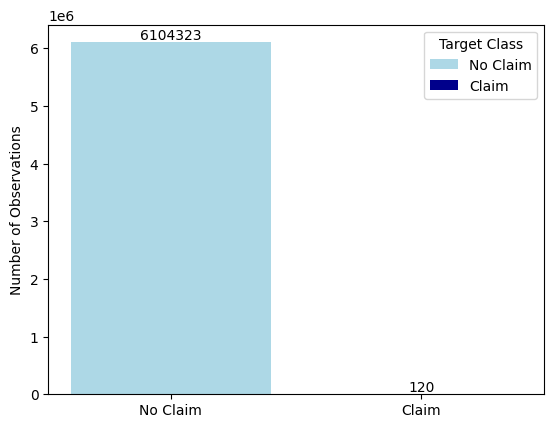

In [22]:
val_no_claim=str(sumary_target['COUNT'][0])
val_claim=str(sumary_target['COUNT'][1])
fig, ax = plt.subplots()
labels = ['No Claim', 'Claim']
counts=df[target].value_counts()
bar_labels = ['No Claim', 'Claim']
bar_colors = ['lightblue', 'darkblue']
ax.bar(labels, counts, label=bar_labels, color=bar_colors)
plt.text(0, counts[0], val_no_claim, ha='center', va='bottom')
plt.text(1, counts[1], val_claim, ha='center', va='bottom')
ax.set_ylabel('Number of Observations')
ax.legend(title='Target Class')
plt.savefig("target class.jpg")
plt.show()

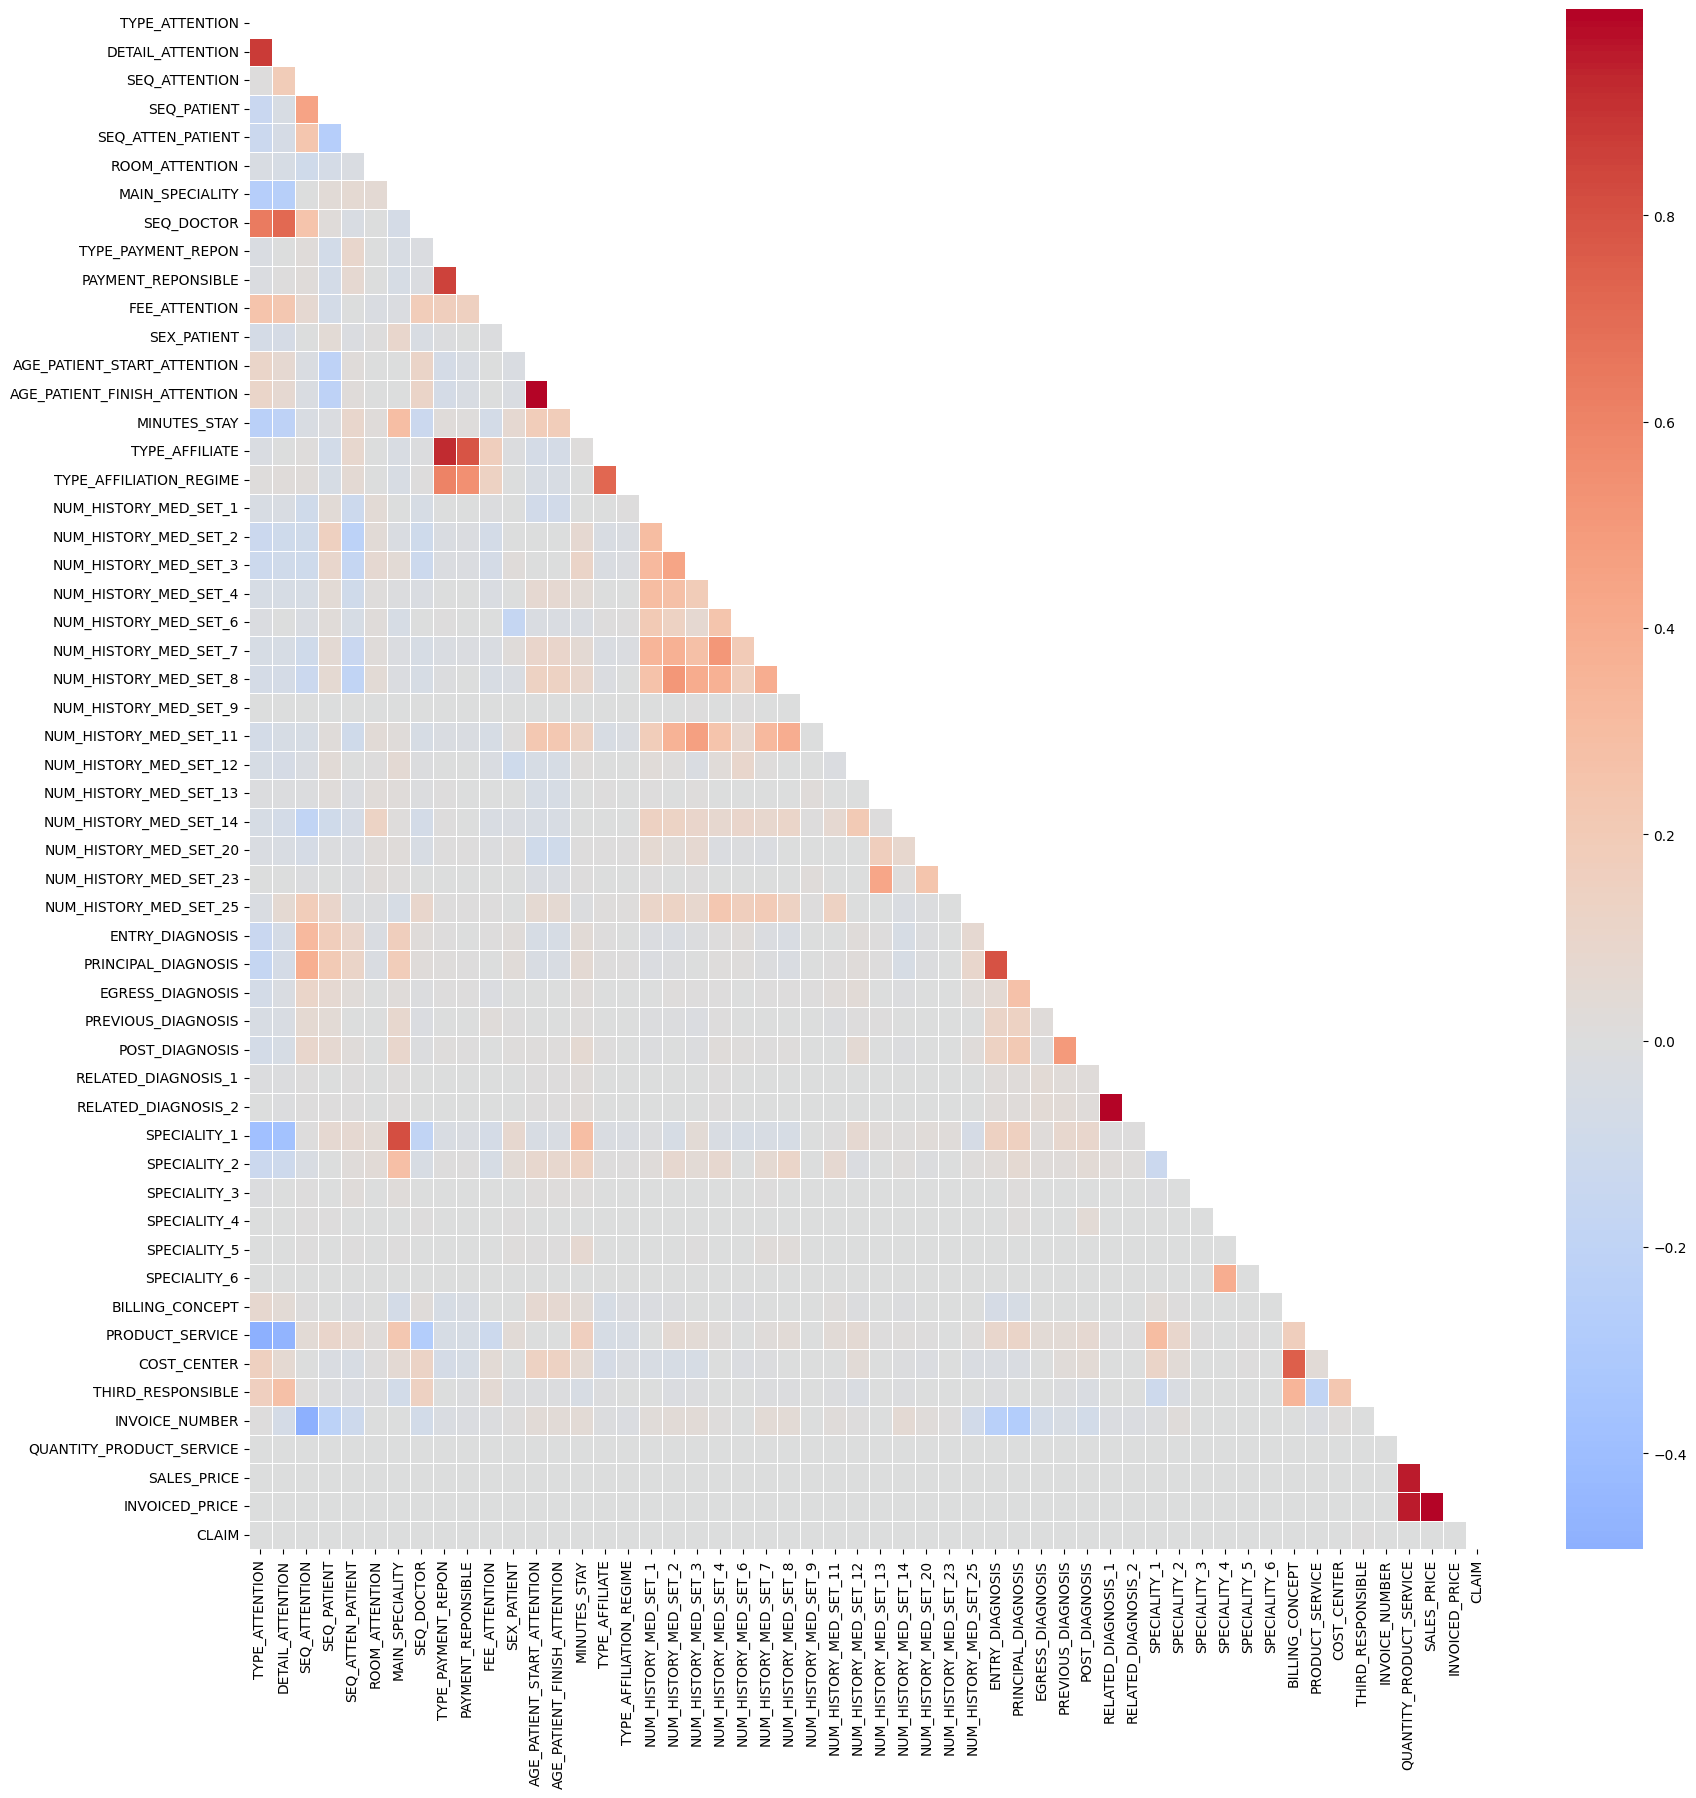

In [23]:
# Correlation matrix
corr = df.corr(method="pearson")
plt.figure(figsize=(20,20)) 
mask=np.triu(np.ones_like(corr,dtype=bool))
cmap='coolwarm'
sns.heatmap(corr, cmap=cmap, mask=mask, center=0, linewidths=0.5, fmt='.2f', annot=False) 
plt.savefig("correlation matrix.jpg")
plt.show()

In [24]:
# Correlation matrix (Data)
corr

,TYPE_ATTENTION,DETAIL_ATTENTION,SEQ_ATTENTION,SEQ_PATIENT,SEQ_ATTEN_PATIENT,ROOM_ATTENTION,MAIN_SPECIALITY,SEQ_DOCTOR,TYPE_PAYMENT_REPON,PAYMENT_REPONSIBLE,...,SPECIALITY_6,BILLING_CONCEPT,PRODUCT_SERVICE,COST_CENTER,THIRD_RESPONSIBLE,INVOICE_NUMBER,QUANTITY_PRODUCT_SERVICE,SALES_PRICE,INVOICED_PRICE,CLAIM
TYPE_ATTENTION,1.000000,0.874689,0.006946,-0.142699,-0.131204,-0.035764,-0.257574,0.633966,-0.025443,-0.015574,...,-1.016843e-03,0.073117,-0.492790,0.152111,0.163858,0.007085,-3.123674e-04,-3.436679e-04,-3.418773e-04,-2.701617e-03
DETAIL_ATTENTION,0.874689,1.000000,0.194298,-0.038104,-0.058713,-0.043856,-0.250394,0.713644,0.001250,0.003868,...,1.545022e-05,0.044087,-0.470528,0.059722,0.279704,-0.066412,-3.765120e-04,-4.153017e-04,-4.135023e-04,-3.243050e-03
SEQ_ATTENTION,0.006946,0.194298,1.000000,0.450526,0.239593,-0.100000,-0.007907,0.255284,0.016477,0.015152,...,-2.760966e-03,0.007922,0.042704,-0.005578,0.013476,-0.488469,-5.529185e-04,-4.657401e-04,-4.656592e-04,-5.149950e-04
SEQ_PATIENT,-0.142699,-0.038104,0.450526,1.000000,-0.255117,-0.065160,0.033666,0.022911,-0.083511,-0.067851,...,-1.632103e-03,-0.000522,0.100902,-0.025822,-0.010565,-0.221002,-6.826055e-05,1.023672e-04,1.020098e-04,1.010852e-03
SEQ_ATTEN_PATIENT,-0.131204,-0.058713,0.239593,-0.255117,1.000000,-0.031521,0.057530,-0.033331,0.086812,0.071756,...,-1.081924e-03,-0.012087,0.067723,-0.038315,-0.020386,-0.112688,-3.129560e-04,-3.603281e-04,-3.605235e-04,-1.784343e-04
ROOM_ATTENTION,-0.035764,-0.043856,-0.100000,-0.065160,-0.031521,1.000000,0.054421,-0.006794,-0.003317,-0.004644,...,-9.949507e-05,0.002465,0.020211,0.002941,-0.011256,0.002329,-2.721459e-05,-3.306109e-05,-3.315672e-05,-2.643452e-04
MAIN_SPECIALITY,-0.257574,-0.250394,-0.007907,0.033666,0.057530,0.054421,1.000000,-0.062633,-0.043699,-0.044399,...,-1.263736e-03,-0.075388,0.228406,0.052433,-0.079358,0.000222,-3.543961e-04,-4.133300e-04,-4.141918e-04,-1.287390e-03
SEQ_DOCTOR,0.633966,0.713644,0.255284,0.022911,-0.033331,-0.006794,-0.062633,1.000000,-0.019463,-0.015985,...,1.202087e-03,0.018855,-0.272540,0.121050,0.148311,-0.084361,-6.805133e-04,-7.655617e-04,-7.644647e-04,-4.857932e-03
TYPE_PAYMENT_REPON,-0.025443,0.001250,0.016477,-0.083511,0.086812,-0.003317,-0.043699,-0.019463,1.000000,0.853466,...,3.413109e-04,-0.051686,-0.051693,-0.063511,-0.008496,-0.021040,9.906269e-05,1.105262e-04,1.109734e-04,9.068177e-04
PAYMENT_REPONSIBLE,-0.015574,0.003868,0.015152,-0.067851,0.071756,-0.004644,-0.044399,-0.015985,0.853466,1.000000,...,2.602332e-04,-0.037229,-0.046516,-0.047911,-0.008979,-0.017008,9.123265e-05,1.170832e-04,1.174633e-04,6.957665e-04


In [25]:
# Free uo dataframe (corr) memory space
corr.drop(corr.index, inplace=True)